## Equipo 7
#### Grupo: 002
#### Integrantes:
#### 1745134 Ramírez Arellano Nathanael
#### 1795417 Mendoza Sanchez Evelin Yamile
#### 1798181 Tello Esparza Jesus Omar

### 1) Página donde se encuentra la base de datos:
#### [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

### 2) Descripción de los datos
Tipo de datos: Conjunto de tablas que muestra la información de la asociación de lo que causa una enfermedad cardiaca.
Las columnas que contiene la base de datos son las siguientes:
- Age: Edad en años.
-         Anaemia: Disminución de glóbulos rojos o hemoglobina (booleano).
-         Creatinine_phosphokinase: Nivel de la enzima CPK en sangre (mcg / L).
-         Diabetes: Si el paciente tiene diabetes.
-         Ejection_fraction: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje).
-         High_blood_pressure: Si el paciente tiene hipertensión (booleana).
-        Platelets: Plaquetas en la sangre (kiloplaquetas / mL).
-         Serum_creatinine: Nivel de creatinina sérica en sangre (mg / dL).
-        Serum_sodium: Nivel de sodio sérico en sangre (mEq / L).
-         Sex: Género de la persona.
-         Smoking: Si el paciente es fumador activo.
-         Time: Tiempo en días que es observado el paciente.
-          DEATH_EVENT: Si el paciente falleció en el periodo de observación se denota por el número 1, si el paciente sigue vivo durante el periodo de observación se denota por el número 2.


### 3) Justificación del uso de los datos
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial, cobrando un estimado de 17,9 millones de vidas cada año, lo que representa el 31% de todas las muertes en todo el mundo.
La insuficiencia cardíaca es un evento común causado por las enfermedades cardiovasculares y este conjunto de datos contiene 12 características que pueden usarse para predecir la mortalidad por insuficiencia cardíaca.
 
La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol mediante estrategias de población.
 
Las personas con enfermedad cardiovascular o que se encuentran en alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces donde un modelo de aprendizaje automático puede ser de gran ayuda.

### 4) Objetivo principal
Que enfermedades tienen una mayor probabilidad a desembocar una muerte por enfermedades cardiovasculares.

Preguntas de interés:
- ¿Cuáles son las causas de las enfermedades del corazón?
- ¿Cuáles son los factores de riesgo que se pueden controlar?
- ¿Cómo se pueden prevenir las enfermedades del corazón?


## Limpieza de datos

In [34]:
import pandas as pd
import numpy as np
import json

#llamamos el archivo de excel
heartbase = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### a) Mostrar los datos sin manipulación

In [35]:
heartbase

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Modificamos el nombre de las columnas, las cambiaremos al idioma español.

In [36]:
heartbase = heartbase.rename(columns = {'age':'Edad','anaemia':'Anemia','creatinine_phosphokinase':'Creatina_Fosfoquinasa','diabetes':'Diabetes','ejection_fraction':'Fraccion_de_Eyeccion',
                           'high_blood_pressure':'Hipertension','platelets':'Plaquetas','serum_creatinine':'Suero_de_Creatinina','serum_sodium':'Suero_de_Sodio','sex':'Sexo',
                           'smoking':'Fumador','time':'Tiempo','DEATH_EVENT':'Muerte'}) #los nombres de las columnas se modificaron al idioma español

Para nuestro análisis, no es necesario eliminar ninguna columna ni manipular datos nulos, ya que toda la información en relevante y no contamos con datos nulos.

### e) Crear un nuevo archivo con la base de datos editada.

In [37]:
heartbase.to_csv('NewHeartBase.csv')

## Estadística básica de los datos

Empezaremos calculando el promedio y la mediana de la edad de nuestros pacientes, de esta manera podremos tener una idea de la salud que podemos esperar de ellos.
Tenemos un total de 299 pacientes.

In [38]:
heartbase['Edad'].count()

299

In [39]:
heartbase['Edad'].mean()

60.83389297658862

In [40]:
heartbase['Edad'].median()

60.0

A continuación veremos los pacientes que duraron más y menos en periodo de observación.

In [41]:
heartbase['Tiempo'].min()

4

In [42]:
heartbase['Tiempo'].max()

285

Hagamos un pequeño analisis sobre los niveles de sodio en la sangre.

In [43]:
heartbase['Suero_de_Sodio'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: Suero_de_Sodio, dtype: float64

Observemos de nuestros pacientes cuantos son hombres.
Los restantes 105 pacientes serían mujeres.

In [44]:
heartbase['Sexo'].sum()

194

Para finalizar, observemos cuántos pacientes murieron.
96 de los pacientes murieron.

In [45]:
heartbase['Muerte'].sum()

96

A continuación visualizamos algunos valores que se obtuvieron mediante el manejo de la estadística y cual es su interpretación.

La base de datos cuenta con un total de 299 datos, los cuales son pacientes que padecen de alguna enfermedad cardiovascular, inicialmente empleamos una sumatoria para saber cuántos pacientes fallecieron mientras estuvieron en observación y se pudo determinar que el número de pacientes fallecidos por principalmente una enfermedad cardiovascular fue de 96 restando así un total de 203 pacientes vivos que estuvieron en observación.
También se observó que la edad promedio en los pacientes fue de 60 y el número de pacientes cuyo sexo es masculino es de 194 comparando con el femenino que es de 104, asi comprendiendo que el sexo con mayor número de pacientes en observación son hombres.

Se pudo observar el tiempo máximo y mínimo que un paciente fue observado siendo así de 4 días y 285 días correspondientes.

Se obtuvo un resumen estadístico sobre los niveles de sodio en la sangre de los pacientes obteniendo la media, desviación, varianza, entre otros datos estadísticos.

## Gráficas
Apliquemos algunas gráficas que nos ayuden a entender mejor nuestra base de datos.

In [46]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='Sexo', ylabel='Edad'>

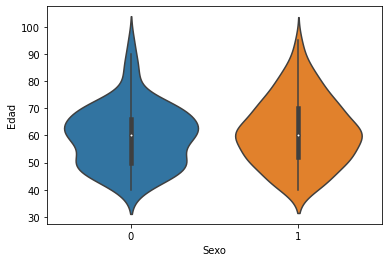

In [47]:
sns.violinplot(x='Sexo',y='Edad',data=heartbase)

La gráfica de violin anterior nos permite observar la distribución de las edades para cada sexo, podemos observar que la mayoría de las observaciones se encuentran entre las edades de 40 y 70 años.

<AxesSubplot:>

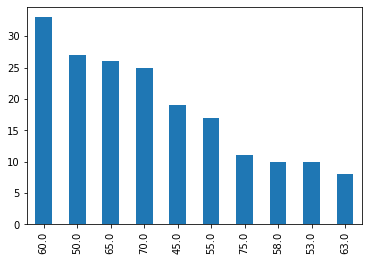

In [48]:
heartbase['Edad'].value_counts().head(10).plot.bar()

Nuestra gráfica de barras nos muestra que más de 30 pacientes tienen 60 años de edad, detrás vienen las edades de 50, 65 y 70 años, teniendo cerca de 25 pacientes cada uno.

<AxesSubplot:ylabel='Frequency'>

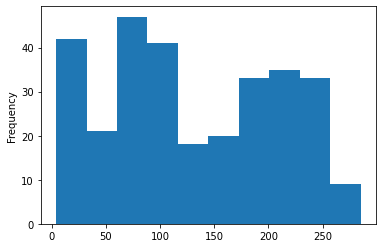

In [49]:
heartbase['Tiempo'].plot.hist()

El histograma nos muestra que la mayoría de los pacientes fueron observados o menos de un mes o más de 6 meses.

<AxesSubplot:xlabel='Muerte', ylabel='Diabetes'>

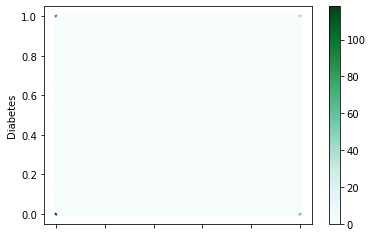

In [50]:
heartbase.plot.hexbin(x='Muerte', y='Diabetes')

El gráfico de dispersión anterior nos indica que el estar diagnosticado con diabetes no es un gran factor de muerte.

<AxesSubplot:xlabel='Muerte', ylabel='Sexo'>

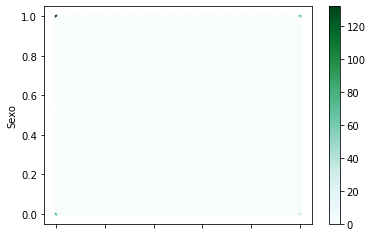

In [51]:
heartbase.plot.hexbin(x='Muerte', y='Sexo')

Este gráfico de dispersión nos enseña que se mueren más hombres que mujeres por problemas cardiovasculares.

## Conclusión
Después de realizar el análisis estadístico podemos dar hincapié a una primera conclusión que será la base para continuar nuestro proyecto el cual era que enfermedades podrían desembocar en una enfermedad cardiovascular y la respuesta es la siguiente:

Las enfermedades que pueden desembocar una enfermedad cardiovascular son factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida

¿Cómo se pueden prevenir las enfermedades del corazón?

La mayoría de las enfermedades cardiovasculares se pueden prevenir reduciendo o eliminando el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol mediante estrategias de población.
